## This notebook supports the manuscript:

# Morgan LK, Sea-level rise impacts to groundwater - exploring some misconceptions, Submitted to Hydrogeology Journal 

Leanne K. Morgan

Waterways Centre, School of Earth and Environment, Private Bag 4800, University of Canterbury, Christchurch, 8140, New Zealand; ORCID 0000-0003-1616-8839

Correspondence to: leanne.morgan@canterbury.ac.nz

The author respectfully requests that this notebook and the link to this notebook are not shared during the review process. 


## Introduction

Coastal aquifers are an important source of fresh water at many locations globally (Michael et al. 2017; Jiao and Post, 2019). However, climate change induced sea level rise (SLR) poses a serious threat (Ferguson and Gleeson 2012; Lu et al. 2013). SLR can impact groundwater in coastal aquifers through the inland subsurface movement of seawater, a process referred to as seawater intrusion (SI). SI threatens the water quality of supply wells and reduces freshwater volumes in coastal aquifers, leading to reduced water security (Werner et al. 2013; Morgan et al. 2012). SI associated with SLR has been studied extensively in recent decades, including the underlying physical processes and appropriate models to use for assessment and prediction (e.g., Werner and Simmons 2009; Ataie-Ashtiani et al. 2013; Michael et al. 2013; Werner et al. 2013; Ketabchi et al. 2016).

The Strack (1976, 1989) approach to conceptualising and quantifying physical processes in coastal aquifers is widely used and well-accepted (Werner et al. 2012; Morgan et al. 2013; Beebe et al. 2016). In coastal aquifers, fresh groundwater (derived from terrestrial recharge) interacts with seawater. The location where the fresh groundwater and the seawater interact is commonly referred to as the interface. As seawater is denser than freshwater, the seawater tends to form a wedge under the freshwater. A conceptual model is shown in Figure 1. 

<img src="Figure_1.png" width="700"/>

**Figure 1. Conceptual diagram of a coastal aquifer.**

The problem domain is bounded by the ocean (to the right) and an inland boundary (to the left). While the problem domain is theoretically infinite in the landward direction, the cross section is assumed to occur in a coastal fringe of between 1 km and 5 km from the coast. The depth to the interface below sea level  $ z $ [L] is given by the well-known Ghyben-Herzberg relation (Ghyben, 1888; Herzberg, 1901): $ z = h / δ $ , where $ h $ [L] is the hydraulic head and $ δ $ is the density difference ratio given by $ δ = (ρ_s - ρ_f)/ρ_f $ [-]. Here $ ρ_s $ [M/L<sup>3</sup>] is the density of the seawater (usually around 1025 kg/m<sup>3</sup>) and $ ρ_f $  [M/L<sup>3</sup>] is the density of the freshwater (usually around 1000 kg/m<sup>3</sup>). As such, the Ghyben-Herzberg relation tells us that at any point in a coastal aquifer the depth to the interface below sea level will be $ 1/δ $  (about 40) times the hydraulic head at that location. The inland location where the interface intersects the aquifer base (referred to as the interface toe;  $ x_T $ [L]) is used to separate the problem domain into two regions: a region without the interface (zone 1) and a region containing the interface (zone 2).

The water budget for the problem domain shown in Figure 1 is comprised of freshwater discharge to the sea ($ q_{0} $ [L<sup>2</sup>/T]), lateral flow from aquifers inland of the landward boundary ($ q_{b} $ [L<sup>2</sup>/T]), and net recharge ($ W $ [L<sup>2</sup>/T]), accounting for infiltration, evapotranspiration and distributed pumping. If the distance from the coast to the inland boundary of the problem domain is $ x_b $, we can additionally define the flux at the coast under steady state conditions as the sum of the recharge over the problem domain plus the flux into the problem domain from inland aquifers i.e., $ q_0 = Wx_b + q_b $. 

Following the Strack (1976, 1989) approach, Morgan et al. (2013) characterised $ q_0 $ as a function of the aquifer parameters defined above, as well as hydraulic conductivity $ K $ [L/T] and a measured hydraulic head $ h_b $ [L] a distance $ x_b $ [L] from the coast. 

In Zone 1:

$$
  q_o =\frac{K((h_b+z_0)^2 - (1 + \delta)z_0^2)+Wx_b^2}{2x_b}\qquad{(\text{Equation 1})}             
$$ 


And in Zone 2 it is:

$$
  q_o =(\frac{1+\delta}{\delta})\frac{K}{2x_b}h_b^2+\frac{Wx_b}{2}\qquad{(\text{Equation 2})}             
$$


The choice of equation (1) or (2) depends on whether $ h_b $ has been measured inland of the interface (in Zone 1) or above the interface (in Zone 2). We can determine this by considering that if $ h_b $ is greater than $ δz_0 $ (i.e., greater than head at the interface toe location) it is in Zone 1 and if $ h_b $ is less than $ δz_0 $ it is in Zone 2. 



The position of $ x_T $ is given by:
$$
  x_T =\frac{q_0}{W_{net}}-\sqrt{(\frac{q_0}{W})^2-\frac{K\delta(1+\delta)z_0^2}{W}}\qquad{(\text{Equation 3})}             
$$


And the distribution of hydraulic head $ h_f $ [L] is, in Zone 1: 


$$
  h_f =\sqrt{\frac{2q_0x-Wx^2}{K}+(1+\delta)z_0^2}-z_0\qquad{(\text{Equation 4})}             
$$

In Zone 2:
    
$$
  h_f =\sqrt{(\frac{\delta}{1+\delta})\frac{2q_0x-Wx^2}{K}}\qquad{(\text{Equation 
  5})}             
$$   


So, now we have an analytic modelling framework that accounts for the different density of freshwater and sea water, as well as aquifer parameters, including sea level (i.e., $ z_0 $). For a base case aquifer with the following parameters $ h_b $ = 3m, $ x_b $= 3500 m, $ K $= 10 m/d, $ W $= 20 mm/yr, $ z_0 $ = 30 m, $ δ $= 0.025 we can determine that our observation data is in Zone 1 and $ q_0 $ equals 0.33 m<sup>2</sup>/d. The location of the water table, interface and wedge toe can be seen in Figure 2. The sliders can be used to alter aquifer parameters and observe the impact on the water table and interface position. 

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from ipywidgets import interact, FloatSlider
%matplotlib inline

In [2]:
# Set aquifer parameters here, all units in m and d
hb = 3.
xb = 3500.
K = 10.
W = 20.*1.e-3/365.25  # converts mm/yr to m/d
z0 = 30.
delta = 0.025
xlim = [-100,3500]
x = np.linspace(*xlim, 1001)

# determine whether observed data is in zone 1 or 2 and calculate q0
if hb < z0 * delta:
    print("Your observation data is in zone 2")
else:
    print("Your observation data is in zone 1")
    
# function to calculate q0 flux at the coast
def q0f(K,hb,z0,W,xb,delta=0.025):   
    if hb < z0 * delta:
        return ((1+delta)/delta)*K/(2*xb)*hb**2+W*xb/2
    else:
        return (K*((hb+z0)**2-(1+delta)*z0**2)+W*xb**2)/(2*xb)  

# calculate q0
q0 = q0f(K,hb,z0,W,xb)

# print q0
txt = "q\u2080 = {:.3f} m\u00b2/d "    #Here using unicode for subscript and superscript
print(txt.format(q0))

# function to calculate toe position
def xtf(q0,W,K,z0,delta=0.025):
    return q0/W-np.sqrt((q0/W)**2-(K*delta*(1+delta)*z0**2)/W)

# calculate xt
xt = xtf(q0,W,K,z0,delta=0.025)

# function to calculate water table distribution
def hff(x, q0, W, K, z0, xt, delta=0.025):
    hf = np.array([])  
    for xi in x:
        if xi > xt:
            hf = np.append(hf, np.sqrt((2*q0*xi-W*xi**2)/K+(1+delta)*z0**2) - z0)
        elif xi < 0:
            hf = np.append(hf,0.)
        else:
            hf = np.append(hf,np.sqrt((delta/(1+delta))*(2*q0*xi-W*xi**2)/K))
    return hf

# calculate water table distribution
hf=hff(x,q0, W, K, z0, xt, delta=0.025)

# calculate interface
z = -hf/delta
z[x>xt] = -z0

# assign name to pre_SLR toe (xt_pre), water table (hf_pre) and interface (z_pre) distribution
xt_pre = xt
hf_pre = hf
z_pre = z

Your observation data is in zone 1
q₀ = 0.334 m²/d 


In [3]:
# interface animation
def interface(K, W, hb):
    # set some initial values for aquifer parameters all units in m and d
    W *= 1.e-3/365.25
    z0 = 30.
    xb = 3500.
    delta = 0.025
    xlim = [-100,3500]
    x = np.linspace(*xlim, 1001)
    
    # calculate ground surface as 3 x water table for these numbers
    h0 = 3*hff(x, q0f(20,3,z0,20*1.e-3/365.25,xb), 20*1.e-3/365.25, 20, z0, xtf(q0f(20,3,z0,20*1.e-3/365.25,xb),20*1.e-3/365.25,20,z0))
    
    q0 = q0f(K,hb,z0,W,xb)  # calc outflow
    xt = xtf(q0,W,K,z0)   # calc toe
    hf=hff(x,q0, W, K, z0, xt, delta=0.025)   # calc water table
   
    # set up animation plots
    f,ax = plt.subplots(1,1,figsize=(12,6))
    z = -hf/delta  # calc interface
    z = np.array([np.max([-z0, zi]) for zi in z])  # truncate at aquifer base
    ax.fill_between(x, 0.*z-z0, h0, color='#e1c699', alpha=0.75)  # shade land
    ax.fill_between(x, z, hf, color='b', alpha=0.5)    # shade freshwater
    ax.fill_between(x, 0.*z-z0, z, color='b', alpha=0.7)   # shade saltwater
    ax.plot(x,hf,'k-')  # water table
    ax.plot(x,z,'k-')  # interface
    ax.axhline(0, color='k', linestyle='--') # horizontal line at sea level
#    ax.axvline(xt, color='k', linestyle='--') # vertical line dividing zones 1 and 2
    ax.set_xlim(xlim[::-1])    # reverses the x-axis direction
    ax.set_ylim([-z0-0.5, 10.])   # fix ylim to avoid replotting when new parameters
    # add labels for key variables
    ax.text(0.98,0.99,'$q_0$={:3.2f} m$^2$/d'.format(q0), size=12, ha='right', va='top', transform=ax.transAxes)
    ax.text(0.98,0.94,'$x_t$={:d} m'.format(int(xt)), size=12, ha='right', va='top', transform=ax.transAxes)
#    ax.text(0.98,0.81,'$V\u209B_w$={:d} m$^2$/d'.format(int(Vsw)), size=12, ha='right', va='top', transform=ax.transAxes)    
    plt.show()

# slider objects for varying parameters in argument of interface() function
K = FloatSlider(description='$K$ (m/d)',min=5,max=100,step=5,value=10)
W = FloatSlider(description='$W$ (mm/y)',min=5,max=100,step=5,value=20)
hb = FloatSlider(description='$h_b$ (m)',min=0.2,max=10,step=0.2,value=3)

# sets up the interactive widget
interact(interface, K=K, W=W, hb=hb)

interactive(children=(FloatSlider(value=10.0, description='$K$ (m/d)', min=5.0, step=5.0), FloatSlider(value=2…

<function __main__.interface(K, W, hb)>

**Figure 2. Watertable and interface position for a typical coastal aquifer**

Next step is to change the sea level by ∆ $ z_0 $ [L] in our model and see what happens to the water table. For this purpose, we will define the SLR-induced change in water table height $ Δh $ [L] relative to the base of the aquifer as (Morgan & Werner, 2016):

$$
  ∆h =h_f' - h_f + ∆z_0\qquad{(\text{Equation 6})}             
$$



Here $ h_f’ $ [L] is the new hydraulic head under SLR. The $ ∆z_0 $ term in Equation 6 is required because the datum from which $ h_f $ and $ h_f’ $ are measured (i.e., sea level) changes and this change needs to be accounted for when calculating the change in water table height. 

When solving problems of this type we need to consider the conditions at the boundaries of our problem domain. We know what is happening at the coastal boundary – we are imposing a change in head (of $ ∆z_0 $). But what about the inland boundary? We will consider two end-member conditions, termed flux-controlled and head-controlled. 

Under the flux-controlled condition, the flux at the inland boundary ($ q_b $) is constant and independent of SLR. So, assuming that both $ W $ and $ x_b $ do not change with SLR, $ q_0 $ will not change either. The new hydraulic head $ h_f’ $ under SLR can therefore be estimated using Equations 4 and 5 by simply replacing $ z_0 $ with $ z_0 + ∆z_0 $. The value of $ q_0 $ is unchanged, and is obtained from Equation 1 or 2. Substituting into Equation 6 then gives the change in water table height as follows:


In Zone 1:
$$
  h_f =\sqrt{\frac{2q_0x-Wx^2}{K}+(1+\delta)(z_0+∆z_0)^2}-\sqrt{\frac{2q_0x-Wx^2}{K}+(1+\delta)z_0^2}\qquad{(\text{Equation 7})}             
$$

In Zone 2:
$$
  ∆h=∆z_0\qquad{(\text{Equation 8})}             
$$



It can be seen from Equation 8 that in Zone 2, the change in the water table height equals SLR. However, in Zone 1, a more complex relationship exists, as shown by Equation 7. The physical explanation for this is that in Zone 1, the rise in the water table increases the aquifer transmissivity, which in turn reduces the hydraulic gradient required to transmit the same flow rate through the aquifer. This means that the water table rise is less than the SLR in Zone 1. In Zone 2, the water table and interface rise in unison with SLR (the freshwater lens is behaving like a bubble) and transmissivity is not altered. 

Under head-controlled conditions, the water table rises with SLR at the coast, but this rise diminishes landward because the head is fixed at the inland boundary. As such, the hydraulic gradient changes and the flux toward the coast will also change. The post-SLR flux at the coast $ q_0’ $ [L] is determined from Equation 1 or 2 by replacing $ z_0 $ with $ z_0 + ∆z_0 $ and $ h_b $ with $ h_b - ∆z_0 $. Hydraulic head $ h_f’ $ under SLR is then determined from Equations 3 and 4 with $ z_0 $ replaced by $ z_0 + ∆z_0 $ and $ q_0 $ replaced with $ q_0’ $. For the sake of brevity, we have not included the resulting equations for $ Δh $ here. However, it is easy to see conceptually that in both Zone 1 and Zone 2 $ Δh ≠ ∆z_0 $.

We can use the above theory to visualise the change in water table and interface location under both flux-controlled and head-controlled conditions for a SLR of 2 m (Figure 3). Steady-state conditions are assumed in this analysis. The below code can be used to further explore this under varying aquifer properties and SLR values. Some knowledge of the Python coding language is assumed. 

Sea level is now 32.0 m


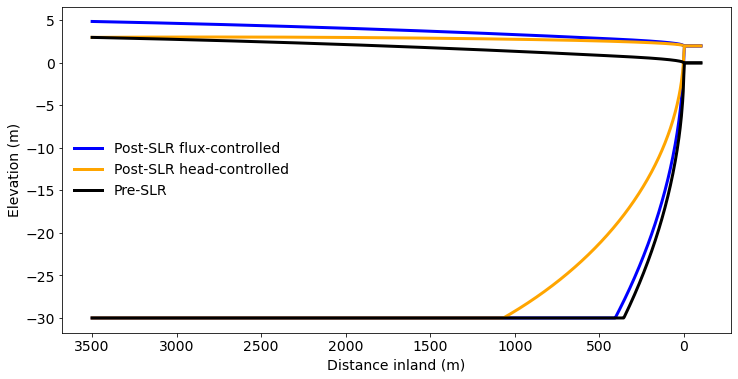

In [4]:
## Define parameters again
hb = 3.
xb = 3500.
K = 10.
W = 20.*1.e-3/365.25  # convert to m/d
z0 = 30.
delta = 0.025
zchange = 2  # Sea level change
z0n = zchange + z0   # New sea level
print("Sea level is now", z0n, "m")

## SLR under flux-controlled conditions
# Calculate xt, water table, interface
xt = xtf(q0,W,K,z0n,delta=0.025)
hf=hff(x,q0, W, K, z0n, xt, delta=0.025)
z = -hf/delta
z[x>xt] = -z0n

# assign name to post_SLR toe (xt_flux), water table (hf_flux) and interface (z_flux) for flux-constrolled boundary
xt_flux = xt
hf_flux = hf
z_flux = z

## SLR under head-controlled conditions
# Calculate xt, water table, interface
q0n = q0f(K, hb-zchange, z0n, W, xb, delta=0.025)   
xt = xtf(q0n, W, K, z0n, delta=0.025)
hf=hff(x,q0n, W, K, z0n, xt, delta=0.025)
z = -hf/delta
z[x>xt] = -z0n

# assign name to post_SLR toe (xt_head), water table (hf_head) and interface (z_head) for head-constrolled boundary
xt_head = xt
hf_head = hf
z_head = z

# Plot water table and interface pre and post SLR
plt.rcParams.update({'font.size': 14})  #change font size to 14
plt.subplots(1,1,figsize=(12,6))
plt.plot(x,hf_flux+zchange, color='blue',label = 'Post-SLR flux-controlled', linewidth=3.0)
plt.plot(x,hf_head+zchange, color='orange',label = 'Post-SLR head-controlled', linewidth=3.0)
plt.plot(x,z_flux+zchange, color='blue',linewidth=3.0)
plt.plot(x,z_head+zchange, color='orange',linewidth=3.0)
plt.plot(x,hf_pre, color='k', linewidth=3.0)
plt.plot(x,z_pre, color='k', label = 'Pre-SLR', linewidth=3.0)
plt.legend(frameon=False)
plt.xlabel('Distance inland (m)')
plt.ylabel('Elevation (m)')
plt.gca().invert_xaxis()
plt.savefig('Figure_3.png', dpi=300)


**Figure 3. Impacts of a 2 m SLR in a coastal aquifer under both a flux-controlled and head-controlled inland boundary conditions**

## Misconception 2. Inland movement of the interface causes the rise in the groundwater table under SLR


A second misconception that I have commonly observed is for students to think that the rise in the groundwater table with SLR is caused by the presence and movement of the interface. That is, it is thought that SLR-induced SI is causing the water table to rise. For example, recently a student wrote: “SI causes groundwater shoaling in coastal aquifers under SLR. In response to SI, groundwater shoaling occurs as dense marine water intrudes, and the freshwater table is forced higher”. This idea has also appeared in the popular media. For example: “Sea level is rising and has been now for well over 100 years…That means that when you do get a storm…, the drainage systems …may not be as able to cope as they used to be, because the level of the groundwater is being pushed up by intrusion of seawater because of the sea levels rising.” (Briggs, 2022). Another example is “While many coastal areas are focused on overland flooding as a result of sea level rise, the threat of rising groundwater tables, known as "shoaling", is not as well known or understood. Shoaling occurs when rising seawater pushes inland. The denser marine water underlies shallow freshwater aquifers, pushing them upward. In some low-lying areas, shoaling could force groundwater water to the surface, increasing the likelihood of flood damage” (ScienceDaily, 2020). 

However, it is not SI that is causing shoaling but the change in conditions at the boundary of the problem domain, i.e., the SLR, that is causing the water table to rise. To illustrate this point, if the sea was instead a freshwater lake and the level of the lake rose, then the water table would also rise, despite there not being an interface. The exact nature of the rise in the water table would depend on what is happening further inland, at the inland boundary, as we have seen in the previous section.

Inland movement of the interface is caused by a reduction in flux toward the coast and, to a lesser extent, SLR. This is evident from Equation 3. The SLR causes aquifer transmissivity to increase by a small amount which in turn causes the interface to rise upward and slightly landward. When SLR occurs under flux-controlled conditions, flux toward the coast does not change and SI is solely due to a change in aquifer transmissivity. Conversely, when SLR occurs under head-controlled conditions, SI is due to both a reduction in flux toward the coast and a change in transmissivity. As such, and as shown in Figure 3, SI from SLR is smaller under flux-controlled conditions then head-controlled conditions. Conversely, water table rise is larger under flux-controlled conditions than head-controlled conditions. Clearly then, it is not SI that is causing shoaling. 

While it is not SI that causes shoaling, the presence and movement of the interface does mean the rise of the water table is slightly different to what would have occurred without an interface (hereafter termed the no-interface case). Let’s take a closer look at by how much. Under the no-interface case we can use the same conceptualisation as shown in Figure 1, except that at x = 0 the boundary is freshwater. Using equations for steady flow in an unconfined aquifer with recharge and no interface in Fetter (2001), we have the following:



$$
  q_0 =\frac{K((h_b+z_0)^2 - z_0^2)+Wx_b^2}{2x_b}\qquad{(\text{Equation 9})}             
$$ 


$$
  h_f =\sqrt{\frac{2q_0x-Wx^2}{K}+z_0^2}-z_0\qquad{(\text{Equation 10})}             
$$

Here all parameters are as defined previously. We can now use Equation 6 to determine the change in water level for a change in the coastal boundary of $ Δz_0 $. For a flux-controlled inland boundary condition, $ h_f’ $ is determined using Equation 9 by replacing $ z_0 $ with $ z_0 + ∆z_0 $. The value of $q_0 $ is unchanged and is obtained from Equation 8. For a head-controlled inland boundary condition, $ h_f’ $ is determined using Equation 9 by replacing $ z_0 $ with $ z_0 + ∆z_0 $ and $q_0 $ with $ q_0' $. Here $ q_0' $ is determined using Equation 8 with $ z_0 $ by $ z_0 + ∆z_0 $ and $ h_b $ replaced by $ h_b – z_0 $.

The change in water level for a 2 m SLR is shown in Figure 4 and compared with the no interface case (shown as dashed lines). The difference in water table elevation caused by the presence of the interface under pre-SLR and post-SLR (flux and head-controlled) conditions is shown in Figure 5.


q₀ = 0.366 m²/d 


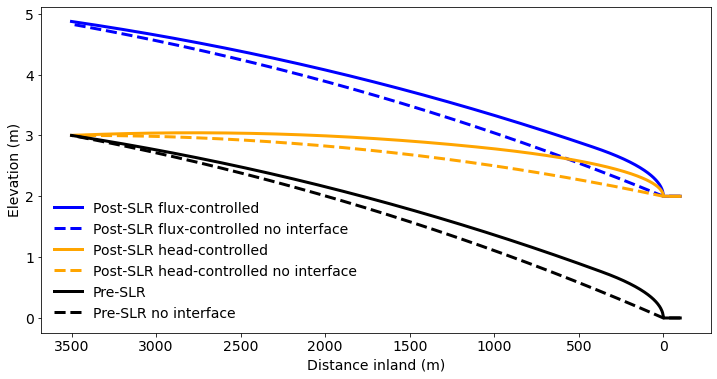

In [5]:
# function to calculate q0 flux at the coast for the no interface case, referred to using a ni subscript
def q0f_ni(K,hb,z0,W,xb):   
    return (K*((hb+z0)**2-z0**2)+W*xb**2)/(2*xb)  

# calculate q0 for the no interface case
q0_ni = q0f_ni(K,hb,z0,W,xb)

# print q0
txt = "q\u2080 = {:.3f} m\u00b2/d "    #Here using unicode for subscript and superscript
print(txt.format(q0_ni))

# function to calculate water table distribution for the no interface case
def hff_ni(x, q0_ni, W, K, z0):
    hf_ni = np.array([])  
    for xi in x:
        if xi < 0:
            hf_ni = np.append(hf_ni,0.)
        else:
            hf_ni = np.append(hf_ni, np.sqrt((2*q0_ni*xi-W*xi**2)/K+z0**2) - z0)
    return hf_ni

# calculate water table distribution for the no interface case
hf_ni=hff_ni(x,q0_ni, W, K, z0)

# assign name to pre SLR head distribution for the no interface case
hf_ni_pre=hf_ni

## SLR under flux-controlled conditions no interface case
# Calculate water table
hf_ni=hff_ni(x,q0_ni, W, K, z0n)

# Assign name to post SLR water table (hf_ni_flux) for flux-controlled conditions and the no interface case
hf_ni_flux = hf_ni

## SLR under head-controlled conditions no interface case
# Calculate flux and water table
q0n_ni = q0f_ni(K,hb-zchange,z0n,W,xb)
hf_ni=hff_ni(x,q0n_ni, W, K, z0n)


# Assign name to post SLR water table (hf_ni_head) for head-controlled conditions and the no interface case
hf_ni_head = hf_ni


# Plot water table pre and post SLR with and without interface
plt.subplots(1,1,figsize=(12,6))
plt.plot(x,hf_flux+zchange, color='blue', label = 'Post-SLR flux-controlled', linewidth=3.0)
plt.plot(x,hf_ni_flux+zchange, color='blue', linestyle='--', label = 'Post-SLR flux-controlled no interface', linewidth=3.0)
plt.plot(x,hf_head+zchange, color='orange', label = 'Post-SLR head-controlled', linewidth=3.0)
plt.plot(x,hf_ni_head+zchange, color='orange', linestyle='--', label = 'Post-SLR head-controlled no interface', linewidth=3.0)
plt.plot(x,hf_pre, color='k', label = 'Pre-SLR', linewidth=3.0)
plt.plot(x,hf_ni_pre, color='k', linestyle='--', label = 'Pre-SLR no interface', linewidth=3.0)
plt.legend(frameon=False)
plt.gca().invert_xaxis()
plt.xlabel('Distance inland (m)')
plt.ylabel('Elevation (m)')
plt.savefig('Figure_4.png', dpi=300)

**Figure 4. Water table elevation for the interface and no interface case under pre-SLR and post-SLR (flux and head-controlled) conditions**

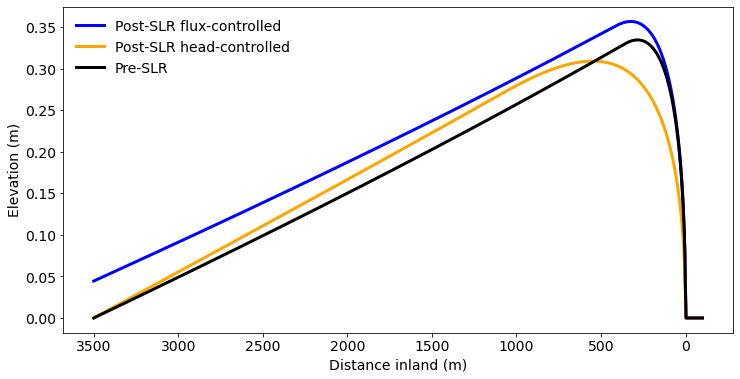

In [6]:
# Plot water table elevation difference from interface 
plt.subplots(1,1,figsize=(12,6))
hf_flux_diff = hf_flux - hf_ni_flux
hf_head_diff = hf_head - hf_ni_head
hf_diff = hf_pre - hf_ni_pre
plt.plot(x,hf_flux_diff, color='blue', label = 'Post-SLR flux-controlled', linewidth=3.0)
plt.plot(x,hf_head_diff, color='orange', label = 'Post-SLR head-controlled', linewidth=3.0)
plt.plot(x,hf_diff, color='k', label = 'Pre-SLR', linewidth=3.0)
plt.legend(frameon=False)
plt.gca().invert_xaxis()
plt.xlabel('Distance inland (m)')
plt.ylabel('Elevation (m)')
plt.savefig('Figure_5.png', dpi=300)

**Figure 5. Difference in water table elevation caused by the presence of the interface under pre-SLR and post-SLR (flux and head-controlled) conditions**

## Misconception 3. SI caused by SLR is small compared to SI caused by pumping

Another common misconception is that SLR causes minimal SI and is therefore not an important risk in terms of aquifer salinization. A widely cited global-scale assessment compared SI from SLR and groundwater pumping and concluded that groundwater pumping is a more important risk (Ferguson and Gleeson, 2012). However, that study assumed flux-controlled conditions and therefore likely underestimated the risk posed by SLR (Lu et al. 2013). As shown in Figure 3, SLR-induced SI under flux-controlled conditions is likely to be minimal compared with head-controlled conditions. Additionally, Lu et al. (2013) highlighted that if changes in saltwater volume (a measure of reduced water security) is used as a quantitative indicator, rather than wedge toe location, impacts of SLR-induced SI (under both flux and head-controlled conditions) will likely lead to more extensive freshwater storage losses than from pumping because while SLR applies to vast lengths of coastline, pumping is generally more localised. Additionally, it is worth noting that groundwater extraction can be managed in a manner that is relatively adaptive to local impacts while climate change induced SLR cannot. 

When considering SLR and SI it is also important to recognise that SLR can cause a change in the class (or type) of SI, resulting in dispersive, rapid and perhaps unexpected aquifer salinisation. Fetter (2001) identified two classes of SI, termed passive and active. Under passive SI, the interface moves landward against the flow of fresh groundwater and is relatively predictable. This is the class of SI detailed so far in this essay. Under active SI, a plume of saltwater moves landward in the same direction as groundwater flow and is highly dispersive relative to passive SI. Werner (2017) identified a third class of SI termed passive-active SI. Passive-active SI occurs when the interface reaches the groundwater mound location (in an unconfined aquifer that has distributed recharge). The distance from the coast to the groundwater mound $ x_n $ [L] is given by $ q_0/W $ and the threshold for passive-active SI to occur is $ x_t/x_n $ = 1 (Werner et al. 2013). In this situation, passive SI occurs on the coastal side of the mound and active SI occurs inland of the mound. 

The onset of passive-active SI is difficult to predict from a management perspective because the location of the groundwater mound and interface are rarely known. Also, passive-active SI can occur despite heads throughout the coastal aquifer being above sea level. In Figure 6, for example, we can see that for the base case aquifer described earlier, the threshold for passive-active SI has been reached under head-controlled conditions for a SLR of 2.3 m. The head at the inland boundary was 3 m pre-SLR, so the head when the threshold was reached is 0.7 m above sea level. Also, the highest groundwater level at the mound is 0.75 m (given by $ δz_0 $; Werner, 2017). As such, in some cases, and especially for thick aquifers, passive-active SI could occur despite aquifer heads being considerably higher than sea level. This makes managing for this threshold difficult. 


<ipython-input-2-a094942c7aae>:33: RuntimeWarning: invalid value encountered in sqrt
  return q0/W-np.sqrt((q0/W)**2-(K*delta*(1+delta)*z0**2)/W)


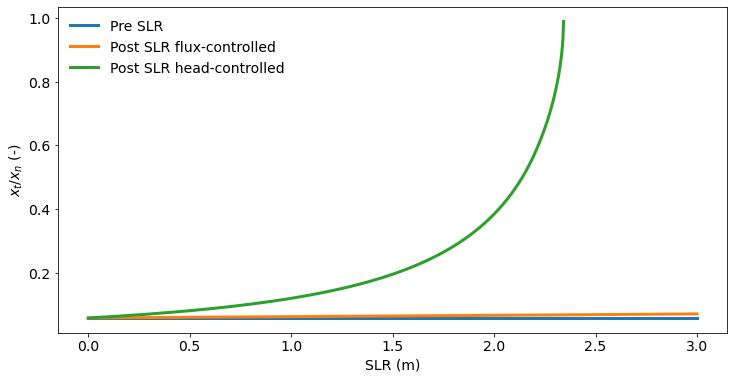

In [7]:
hb = 3
W = 20.*1.e-3/365.25
z0 = 30.
xb = 3500.
delta = 0.025

zchange_array = []
q0_pre_array = []
q0_flux_array = []
q0_head_array = []
xt_pre_array = []
xt_flux_array = []
xt_head_array = []
xn_pre_array = []
xn_flux_array = []
xn_head_array = []
xtdivxn_pre_array = []
xtdivxn_flux_array = []
xtdivxn_head_array = []

for i in np.linspace(0,hb,1000):    # sea level change increments, max change in sea level is hb
    z0n = z0 + i
    q0_pre = q0f(K,hb,z0,W,xb,delta=0.025)  # calc outflow pre SLR  
    q0_flux = q0_pre # calc flux post SLR flux conditions
    q0_head = q0f(K,hb-i,z0n,W,xb,delta=0.025)  # calc flux post SLR head conditions
    xt_pre = xtf(q0_pre,W,K,z0)   # calc toe pre SLR
    xt_flux = xtf(q0_flux,W,K,z0n)   # calc toe pre SLR flux conditions
    xt_head = xtf(q0_head,W,K,z0n)   # calc toe pre SLR head conditions
    xn_pre = q0_pre/W
    xn_flux = q0_flux/W
    xn_head = q0_head/W
    zchange_array.append(i)
    q0_pre_array.append(q0_pre)
    q0_flux_array.append(q0_flux)
    q0_head_array.append(q0_head)
    xt_pre_array.append(xt_pre)
    xt_flux_array.append(xt_flux)
    xt_head_array.append(xt_head)
    xn_pre_array.append(xn_pre)
    xn_flux_array.append(xn_flux)
    xn_head_array.append(xn_head)
    xtdivxn_pre_array.append(xt_pre/xn_pre)
    xtdivxn_flux_array.append(xt_flux/xn_flux)
    xtdivxn_head_array.append(xt_head/xn_head)

plt.subplots(1,1,figsize=(12,6))
plt.plot(zchange_array,xtdivxn_pre_array, label = 'Pre SLR', linewidth=3.0)
plt.plot(zchange_array,xtdivxn_flux_array, label = 'Post SLR flux-controlled', linewidth=3.0)
plt.plot(zchange_array,xtdivxn_head_array, label = 'Post SLR head-controlled', linewidth=3.0)
plt.legend(frameon=False)
plt.xlabel('SLR (m)')
plt.ylabel('$x_t/x_n$ (-)')
plt.savefig('Figure_6.png', dpi=300)



**Figure 6. Onset of passive-active SI with SLR under flux and head-controlled conditions**

Additionally, if land is drained to counter the effects of SLR-induced groundwater shoaling, the resulting head-controlled conditions will increase SI (Figure 3) and the propensity for a transition from a passive to passive-active SI (Figure 6). This highlights the need to manage- both groundwater salinization and shoaling, caused by SLR, in an integrated manner.

## Conclusion

The impacts of SLR to groundwater, including salinisation and shoaling, are widely accepted. However, a number of misconceptions on the topic have been observed. These misconceptions have been explored in this essay using relatively simple analytic models. The models are available in a Jupyter Notebook version of this essay. The key takeaways are as follows:
•	Water table rise is only equal to sea level rise above the interface under flux controlled inland boundary conditions. 
•	Water table rise under SLR is not caused by SI, but rather it caused by the change in levels at the coastal boundary. 
•	SI caused by SLR is a considerable risk, especially under the head-controlled conditions, which will become more common when land is drained to counter the effects of shoaling.



## Acknowledgements

Thanks to David Dempsey for code used in Figure 2.

## Funding Information and Conflicts of Interest

Leanne Morgan is supported by Canterbury Regional Council, New Zealand and Future Coasts Funding from the Ministry of Business Innovation and Employment (MBIE), contract C01X2107. There are no conflicts of interest. 

## References



Ataie-Ashtiani B, Werner AD, Simmons CT, Morgan LK, Lu C (2013) How important is the impact of land-surface inundation on seawater intrusion caused by sea-level rise? Hydrogeology Journal 21(7), pp. 1673-1677. doi: 10.1007/s10040-013-1021-0

Beebe CR, Ferguson G, Gleeson T, Morgan LK, Werner AD (2016) Application of an analytical solution as a screening tool for sea water intrusion, Groundwater 54(5), pp. 709-718. doi: 10.1111/gwat.12411

Befus KM, Barnard PL, Hoover DJ, Finzi Hast JA, Voss CI (2020) Increasing threat of coastal groundwater hazards from sea-level rise in California, Nature Climate Change 10(10) , pp. 946-952, https://www.nature.com/articles/s41558-020-0874-1

Bosserelle AL, Morgan LK, Hughes MW (2022) Groundwater rise and associated flooding in coastal settlements due to sea-level rise: A review of processes and methods, Earth's Future 10(7), https://doi.org/10.1029/2021EF002580

Bosserelle AL, Morgan LK, Setiawan I, (2023) Shallow groundwater characterisation and hydrograph classification in the coastal city of Ōtautahi / Christchurch, New Zealand, Hydrogeology Journal, Under review

Briggs C (2022) In 2022, Australia smashed rain records while floods caused record insurance payouts - ABC News, https://www.abc.net.au/news/2022-12-31/australian-weather-rain-2022-records-broken-flooding/101789262

Chesnaux R (2015) Closed-form analytical solutions for assessing the consequences of sea-level rise on groundwater resources in sloping coastal aquifers. Hydrogeology Journal 23, , pp. 1399–1413. doi:10.1007/s10040-015-1276-8

Engelmann CA, Huntoon JE (2011) Improving student learning by addressing misconceptions, Eos 92(50), pp. 465-466. https://doi.org/10.1029/2011EO500001

Ferguson G, Gleeson T (2012) Vulnerability of coastal aquifers to groundwater use and climate change, Nature Climate Change 2(5), pp. 342-345. https://www.nature.com/articles/nclimate1413

Fetter CW (2001) Applied hydrogeology, Prentice Hall, United States

Ghyben BW (1889) Nota in verband met de voorgenomen putboring nabij Amsterdam (Notes on the Probable Results of the Proposed Well Drilling Near Amsterdam), The Hague: Tijdschrift van het Koninklijk Instituut voor Ingenieurs, 21, 8–22.

Herzberg A (1901) Die Wasserversorgung einiger Nordseebider (The water supply on parts of the North Sea coast in Germany), Journal Gabeleucht ung und Wasserversorg ung, 44, 815-819, 824–844.

Hughes M, Quigley M, van Ballegooy S, Deam B, Bradley B, Hart D, Measures R (2015) The sinking city: earthquakes increase flood hazard in Christchurch, New Zealand. GSA Today 25 (3), , pp. 4–10. https://doi.org/10.1130/GSATG221A.1.

Jiao J, Post V (2019) Coastal hydrogeology. Cambridge University Press

Ketabchi H, Mahmoodzadeh D, Ataie-Ashtiani B, Simmons CT (2016) Sea-level rise impacts on seawater intrusion in coastal aquifers: Review and integration, Journal of Hydrology 535, pp. 235-255. doi: 10.1016/j.jhydrol.2016.01.083

Lu C, Werner AD, Simmons CT (2013) Threats to coastal aquifers, Nature Climate Change 3(7), pp. 605.

Michael HA, Russoniello CJ, Byron LA (2013) Global assessment of vulnerability to sea-level rise intopography-limited and recharge-limited coastal groundwater systems, Water Resources Research 49, pp. 2228–2240. doi:10.1002/wrcr.20213

Michael HA, Post VEA, Wilson AM, Werner AD (2017) Science, society, and the coastal groundwater squeeze, Water Resources Research 53(4), pp. 2610-2617. doi:10.1002/2017WR020851

Morgan LK, Werner AD, Simmons C (2012) On the interpretation of coastal aquifer water level trends and water balances: A precautionary note, Journal of Hydrology 470-471, pp. 280-288.

Morgan LK, Werner AD, Morris MJ, Teubner MD (2013) Application of a rapid-assessment method for seawater intrusion vulnerability: Willunga Basin, South Australia. In Groundwater in the coastal zones of Asia-Pacific, pp. 205–225. https://link.springer.com/chapter/10.1007/978-94-007-5648-9_10 

Morgan LK, Werner AD (2016) Comment on “closed-form analytical solutions for assessing the consequences of sea-level rise on groundwater resources in sloping coastal aquifers”: Paper published in hydrogeology journal (2015) 23:1399–1413, by R. Chesnaux. Hydrogeology Journal, 24(5), pp. 1325–1328. https://link.springer.com/article/10.1007/s10040-016-1398-7

Orchard S, Hughey KFD, Schiel DR (2020) Risk factors for the conservation of saltmarsh vegetation and blue carbon revealed by earthquake-induced sea-level rise, Science of the Total Environment 746, 141241. https://doi.org/10.1016/j.scitotenv.2020.141241.

Pearson C, Denys P, Denham M (2021) Christchurch city ground height monitoring - vertical land motion in eastern Christchurch, Annual Report to Environment Canterbury for Contract 1709–19/20, School of Surveying, Otago University.

Quigley MC, Hughes MW, Bradley BA, van Ballegooy S, Reid C, Morgenroth J, Pettinga JR (2016) The 2010–2011 Canterbury Earthquake Sequence: environmental effects, seismic triggering thresholds and geologic legacy, Tectonophysics 672–673, 228–274. https://doi.org/10.1016/j.tecto.2016.01.044.

ScienceDaily (2020) Sea-level rise linked to higher water tables along California coast. https://www.sciencedaily.com/releases/2020/08/200821103907.htm

Stats NZ (2020) Subnational population estimates (TA, community board), by age and sex, at 30 June 2018-20 (2020 boundaries). http://nzdotstat.stats.govt.nz/wbos/Index.aspx?DataSetCode=TABLECODE7979#.

Strack ODL (1976) A single‐potential solution for regional interface problems in coastal aquifers, Water Resources Research 12(6), pp. 1165-1174. 

Strack ODL (1989) Groundwater mechanics, Englewood Cliffs, New Jersey, Prentice Hall.

Tully K, Gedan K, Epanchin-Niell R, Strong A, Bernhardt ES, Bendor T, Mitchell M, Kominski J, Jordan TE, Neubauer SC, Weston N (2019) The invisible flood: The chemistry, ecology, and social implications of coastal saltwater intrusion, BioScience 69(5), pp. 368–378.

Werner and Simmons (2009) Impact of sea-level rise on sea water intrusion in coastal aquifers, Groundwater 47(2), pp. 197-204.

Werner AD, Bakker M, Post V, Vandenbohede A, Lu C, Ataie-Ashtiani B, Simmons CT, Barry DA (2013) Seawater intrusion processes, investigation and management: Recent advances and future challenges, Advances in Water Resources 51, p. 3-26. https://doi.org/10.1016/j.advwatres.2012.03.004. 

Werner AD, Ward JD, Morgan LK, Simmons CT, Robinson NI, Teubner MD (2012) Vulnerability indicators of seawater intrusion, Groundwater 50(1), pp. 45-58. doi: 10.1111/j.1745-6584.2011.00817.x

Werner AD (2017) On the classification of seawater intrusion, Journal of Hydrology 551, pp. 619-631.

Wilson J (1989) Christchurch - Swamp to City - A Short History of the Christchurch Drainage Board 1875–1989, Te Waihora Press, Lincoln, New Zealand.



In [8]:
import session_info
session_info.show()

ModuleNotFoundError: No module named 'session_info'